In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *

plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')

2023-01-04 18:48:19.331492: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/var/folders/3_/c5z8xsl90_5dwmv58y_dj69h0000gn/T/ipykernel_914/997539015.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
seq_len = 128
symbol = "IBM"
period = "Max"
interval = "1d"
sc = MinMaxScaler()

In [3]:
def downloadStock(symbol, period, interval):
    df = yf.download(symbol, start="2012-01-01", end="2017-01-01", interval=interval).reset_index().drop(columns="Adj Close")
    return df

training_set = downloadStock(symbol, period, interval)
training_set

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Volume
0,2012-01-03,178.518158,180.411087,177.820267,178.107071,5905716
1,2012-01-04,177.409180,178.135757,176.806885,177.380493,4546648
2,2012-01-05,176.682602,176.892929,175.047806,176.539200,4668403
3,2012-01-06,176.281067,176.367111,174.292542,174.512421,5122367
4,2012-01-09,174.187378,174.254303,172.342255,173.604202,5440455
...,...,...,...,...,...,...
1253,2016-12-23,159.655838,160.124283,159.130020,159.378586,1779455
1254,2016-12-27,159.636703,160.592728,159.512421,159.789673,1461785
1255,2016-12-28,159.933075,160.363297,158.699814,158.881454,1838345
1256,2016-12-29,158.718933,159.646271,158.699814,159.273422,1740021


In [4]:
training_set = sc.fit_transform(training_set.iloc[:,1:2].values)

In [5]:
X_train = training_set[0:1257]
y_train = training_set[1:1258]

In [6]:
X_train = np.reshape(X_train, (1257, 1, 1))

In [7]:
regressor = Sequential()
regressor.add(LSTM(
    units = 4,
    activation = 'sigmoid',
    input_shape = (None, 1)
))
regressor.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error'
)

2023-01-04 18:48:23.434351: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
regressor.fit(
    X_train, y_train,
    batch_size = 32,
    epochs = 200
)

Epoch 1/200
40/40 [==============================] - 1s 1ms/step - loss: 0.1477
Epoch 2/200
40/40 [==============================] - 0s 1ms/step - loss: 0.1405
Epoch 3/200
40/40 [==============================] - 0s 1ms/step - loss: 0.1336
Epoch 4/200
40/40 [==============================] - 0s 979us/step - loss: 0.1268
Epoch 5/200
40/40 [==============================] - 0s 1ms/step - loss: 0.1202
Epoch 6/200
40/40 [==============================] - 0s 991us/step - loss: 0.1139
Epoch 7/200
40/40 [==============================] - 0s 957us/step - loss: 0.1079
Epoch 8/200
40/40 [==============================] - 0s 957us/step - loss: 0.1023
Epoch 9/200
40/40 [==============================] - 0s 953us/step - loss: 0.0969
Epoch 10/200
40/40 [==============================] - 0s 985us/step - loss: 0.0919
Epoch 11/200
40/40 [==============================] - 0s 971us/step - loss: 0.0872
Epoch 12/200
40/40 [==============================] - 0s 958us/step - loss: 0.0828
Epoch 13/200
40/40 [=

40/40 [==============================] - 0s 989us/step - loss: 0.0286
Epoch 102/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0284
Epoch 103/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0282
Epoch 104/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0280
Epoch 105/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0278
Epoch 106/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0276
Epoch 107/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0274
Epoch 108/200
40/40 [==============================] - 0s 992us/step - loss: 0.0272
Epoch 109/200
40/40 [==============================] - 0s 976us/step - loss: 0.0270
Epoch 110/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0268
Epoch 111/200
40/40 [==============================] - 0s 981us/step - loss: 0.0266
Epoch 112/200
40/40 [==============================] - 0s 977us/step - loss: 0.0264
Epoch 113/200
40/40 

40/40 [==============================] - 0s 968us/step - loss: 0.0122


In [9]:
test_set = yf.download(symbol, start="2017-01-01", end="2018-01-01", interval=interval).reset_index().drop(columns="Adj Close")

[*********************100%***********************]  1 of 1 completed


In [10]:
real_stock_price = test_set.iloc[:,1:2].values
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (251, 1, 1))

In [13]:
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

predicted_stock_price = list(map(lambda x : x.mean(), predicted_stock_price))

8/8 [==============================] - 0s 1ms/step


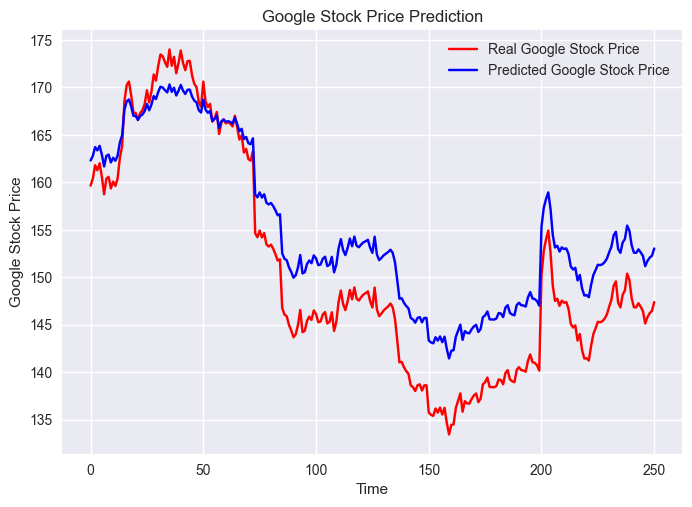

In [14]:
plt.plot(real_stock_price, color= 'red', label= 'Real Google Stock Price')
plt.plot(predicted_stock_price, color= 'blue', label= 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()